In [1]:
"""
MLP Classification on the Breast Cancer Dataset

This script demonstrates an end-to-end pipeline for training a Multilayer Perceptron (MLP)
to classify malignant vs. benign tumors using the Breast Cancer Wisconsin dataset.
It includes data loading, preprocessing, model training, evaluation, and a suite of visualizations:
  - Confusion Matrix with a custom colormap
  - ROC Curve with AUC calculation
  - Training Loss Curve over epochs
  - 2D Decision Boundary via PCA projection

This version is written in a sequential style without function encapsulation.
"""

# -------------------------------
# Step 1: Import Required Libraries
# -------------------------------
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.decomposition import PCA


In [2]:
# -------------------------------
# Step 2: Set Plotting Styles
# -------------------------------
plt.style.use("bmh")  # Using "bmh" style for a fresh look
sns.set_theme(style="whitegrid", palette="deep")

In [3]:
# -------------------------------
# Step 3: Load the Dataset
# -------------------------------
data = load_breast_cancer()
X = data.data       # Feature matrix
y = data.target     # Target vector (0 = malignant, 1 = benign)
feature_names = data.feature_names
target_names = data.target_names


In [4]:
# -------------------------------
# Step 4: Preprocess the Data
# -------------------------------
# Standardize features to have zero mean and unit variance.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# -------------------------------
# Step 5: Split Data into Training and Testing Sets
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

In [6]:
# -------------------------------
# Step 6: Train the MLP Classifier
# -------------------------------
# Configure the MLP with two hidden layers (50 and 25 neurons)
mlp = MLPClassifier(hidden_layer_sizes=(50, 25),
                    activation='relu',
                    solver='adam',
                    max_iter=300,
                    random_state=42,
                    verbose=True)  # Verbose for training progress
mlp.fit(X_train, y_train)


Iteration 1, loss = 0.75630865
Iteration 2, loss = 0.68633851
Iteration 3, loss = 0.62290630
Iteration 4, loss = 0.56733780
Iteration 5, loss = 0.51863764
Iteration 6, loss = 0.47374017
Iteration 7, loss = 0.43407576
Iteration 8, loss = 0.39892221
Iteration 9, loss = 0.36755011
Iteration 10, loss = 0.33940077
Iteration 11, loss = 0.31388146
Iteration 12, loss = 0.29133754
Iteration 13, loss = 0.27062525
Iteration 14, loss = 0.25207959
Iteration 15, loss = 0.23513647
Iteration 16, loss = 0.21991425
Iteration 17, loss = 0.20622959
Iteration 18, loss = 0.19330454
Iteration 19, loss = 0.18240088
Iteration 20, loss = 0.17185768
Iteration 21, loss = 0.16285569
Iteration 22, loss = 0.15414715
Iteration 23, loss = 0.14650100
Iteration 24, loss = 0.13894321
Iteration 25, loss = 0.13248229
Iteration 26, loss = 0.12617818
Iteration 27, loss = 0.12082590
Iteration 28, loss = 0.11612656
Iteration 29, loss = 0.11134770
Iteration 30, loss = 0.10697606
Iteration 31, loss = 0.10329206
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(50, 25), max_iter=300, random_state=42,
              verbose=True)

In [7]:
# -------------------------------
# Step 7: Evaluate the Model
# -------------------------------
# Predict on the test set
y_pred = mlp.predict(X_test)

# Print classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=target_names))

Classification Report:

              precision    recall  f1-score   support

   malignant       0.94      0.98      0.96        64
      benign       0.99      0.96      0.98       107

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



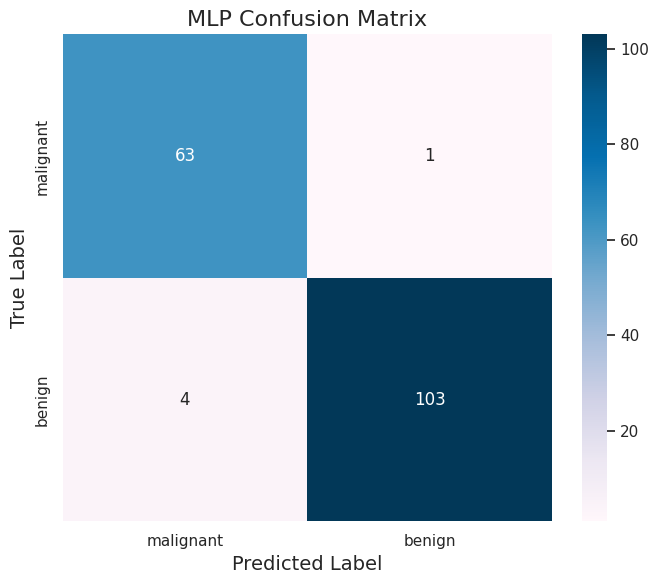

In [8]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using a custom "PuBu" colormap
plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="PuBu",
            xticklabels=target_names, yticklabels=target_names, cbar=True)
plt.title("MLP Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.tight_layout()
plt.show()

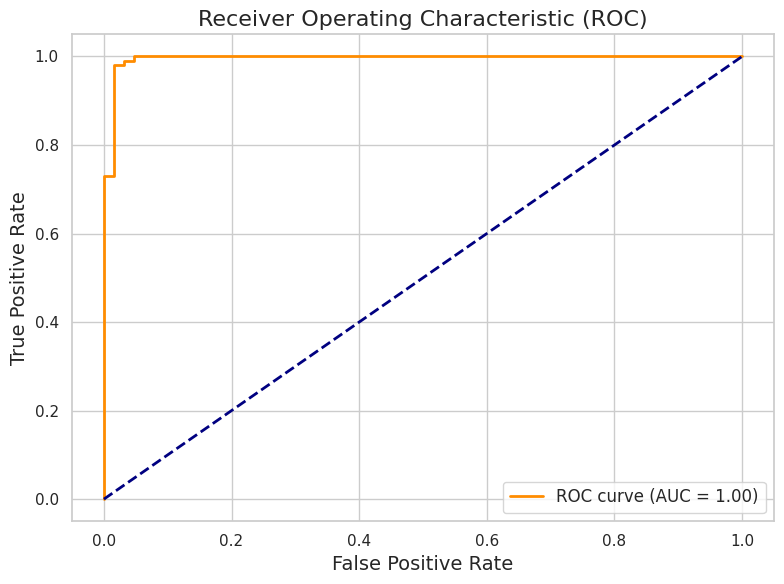

In [9]:
# -------------------------------
# Step 8: Plot the ROC Curve and Compute AUC
# -------------------------------
# Get predicted probabilities for the positive class
y_probs = mlp.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.title("Receiver Operating Characteristic (ROC)", fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.tight_layout()
plt.show()

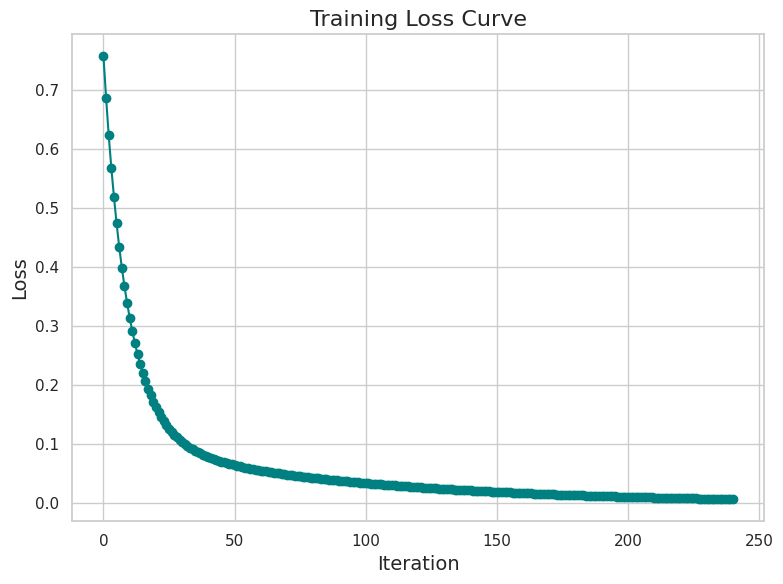

In [10]:
# -------------------------------
# Step 9: Plot the Training Loss Curve
# -------------------------------
if hasattr(mlp, "loss_curve_"):
    plt.figure(figsize=(8,6))
    plt.plot(mlp.loss_curve_, marker="o", linestyle="-", color="teal")
    plt.xlabel("Iteration", fontsize=14)
    plt.ylabel("Loss", fontsize=14)
    plt.title("Training Loss Curve", fontsize=16)
    plt.tight_layout()
    plt.show()
else:
    print("No loss curve data available.")

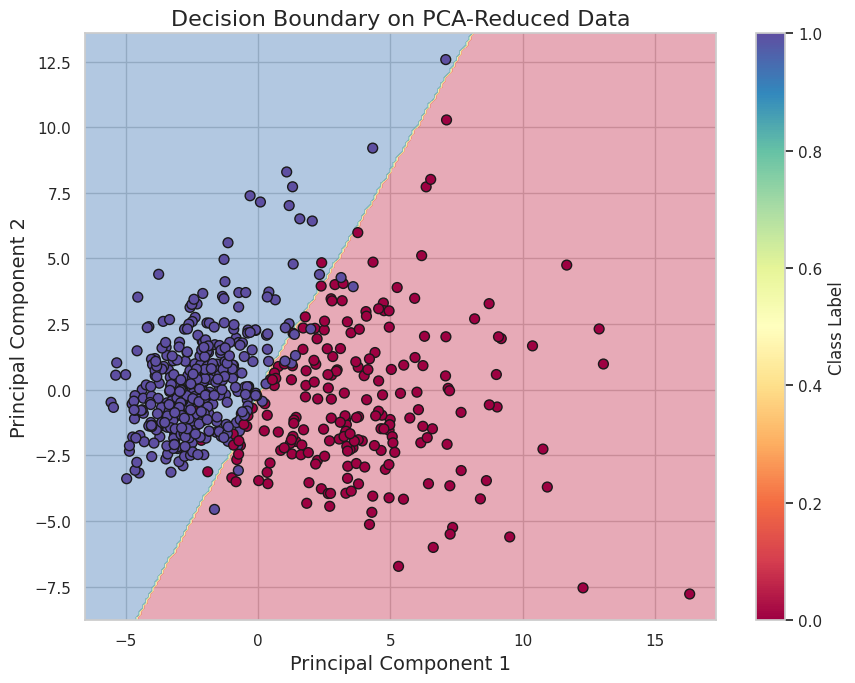

In [11]:
# -------------------------------
# Step 10: Plot the Decision Boundary via PCA
# -------------------------------
# Reduce the data to 2 dimensions using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Train a simple MLP classifier on the PCA-reduced data for visualization purposes
mlp_pca = MLPClassifier(hidden_layer_sizes=(30,), max_iter=300, random_state=42)
mlp_pca.fit(X_pca, y)

# Create a mesh grid for plotting the decision boundary
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Predict over the grid and reshape to match mesh grid dimensions
Z = mlp_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(9,7))
plt.contourf(xx, yy, Z, alpha=0.4, cmap="Spectral")
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="Spectral", edgecolor="k", s=50)
plt.xlabel("Principal Component 1", fontsize=14)
plt.ylabel("Principal Component 2", fontsize=14)
plt.title("Decision Boundary on PCA-Reduced Data", fontsize=16)
plt.colorbar(scatter, label="Class Label")
plt.tight_layout()
plt.show()